<a href="https://colab.research.google.com/github/yuxuan0702/Boston-Crime-/blob/master/Time_Pattern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns 
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster


plt.style.use('ggplot')
%matplotlib inline

In [4]:
# import dataset 
df = pd.read_csv('/content/drive/My Drive/Website_notebook/boston_crime.csv')
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
1,I92102201,3301,NaN,VERBAL DISPUTE,E13,583,0,2019-12-20 03:08:00,2019,12,Friday,3,NaN,DAY ST,42.325122,-71.107779,"(42.32512200, -71.10777900)"
2,I92097173,3115,NaN,INVESTIGATE PERSON,C11,355,0,2019-10-23 00:00:00,2019,10,Wednesday,0,NaN,GIBSON ST,42.297555,-71.059709,"(42.29755500, -71.05970900)"
3,I92094519,3126,NaN,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,765,0,2019-11-22 07:50:00,2019,11,Friday,7,NaN,BROOKS ST,42.355120,-71.162678,"(42.35512000, -71.16267800)"
4,I92089785,3005,NaN,SICK ASSIST,E13,574,0,2019-11-05 18:00:00,2019,11,Tuesday,18,NaN,WASHINGTON ST,42.309718,-71.104294,"(42.30971800, -71.10429400)"


In [5]:
# clean data 
df.drop(columns=['INCIDENT_NUMBER','SHOOTING'],inplace=True)
df = df[(df.YEAR!=2015) & (df.YEAR !=2020)]
df = df[df['DISTRICT']!='External']
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'])
df['OCCURRED_ON_DATE']=df['OCCURRED_ON_DATE'].dt.date
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398013 entries, 1 to 480712
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   OFFENSE_CODE         398013 non-null  int64  
 1   OFFENSE_CODE_GROUP   373242 non-null  object 
 2   OFFENSE_DESCRIPTION  398013 non-null  object 
 3   DISTRICT             395842 non-null  object 
 4   REPORTING_AREA       398013 non-null  object 
 5   OCCURRED_ON_DATE     398013 non-null  object 
 6   YEAR                 398013 non-null  int64  
 7   MONTH                398013 non-null  int64  
 8   DAY_OF_WEEK          398013 non-null  object 
 9   HOUR                 398013 non-null  int64  
 10  UCR_PART             373134 non-null  object 
 11  STREET               384433 non-null  object 
 12  Lat                  372484 non-null  float64
 13  Long                 372484 non-null  float64
 14  Location             398013 non-null  object 
dtypes: float64(2), in

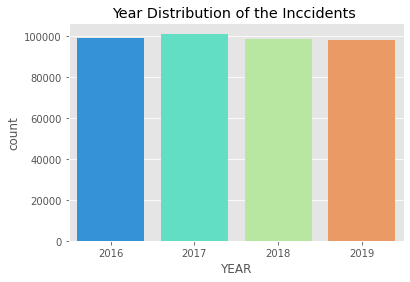

In [6]:
# year distribution 
sns.countplot(data = df, x = 'YEAR',palette='rainbow')
plt.title('Year Distribution of the Inccidents ')
plt.show()

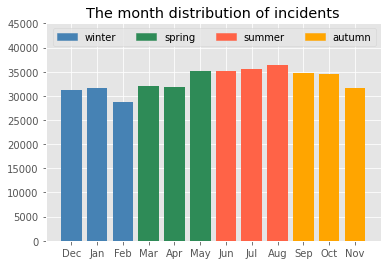

In [7]:
# month distribution data 
Month = ['Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']
month_count = [31128,31549,28695,32093,31867,35098,35093,35483,36337,34665,34476,31529]
color = ['steelblue','steelblue','steelblue','seagreen','seagreen','seagreen','tomato','tomato','tomato','orange','orange','orange']

# month distribution plot 
fig, ax = plt.subplots()
ax.bar(Month,month_count,color=color)

#set title and y axis range 
plt.ylim(0,45000)
plt.title('The month distribution of incidents')

# set legend 
color = ['steelblue','seagreen','tomato','orange']
labels = ['winter', 'spring', 'summer', 'autumn']
patches = [ mpatches.Patch(color=color[i], label="{:s}".format(labels[i]) ) for i in range(len(color)) ] 
ax.legend(handles = patches, ncol = 4)
plt.show()

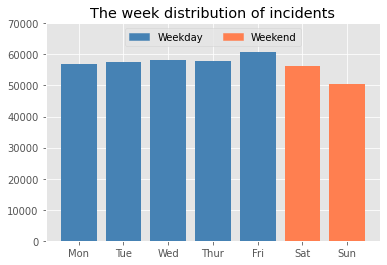

In [8]:
# Week data 
week = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
number_of_incidents = [57019,57465,58310,57999,60745,56133,50395]

# Plot week distribution 
fig, ax = plt.subplots()
ax.bar(week,number_of_incidents,color=['steelblue','steelblue','steelblue','steelblue','steelblue','coral','coral'])

#set title and y axis range 
plt.title('The week distribution of incidents')
plt.ylim(0,70000)

# set legend 
color = ['steelblue','coral']
labels = ['Weekday', 'Weekend']
patches = [ mpatches.Patch(color=color[i], label="{:s}".format(labels[i]) ) for i in range(len(color)) ] 
ax.legend(handles = patches, ncol = 2,loc='upper center')
plt.show()

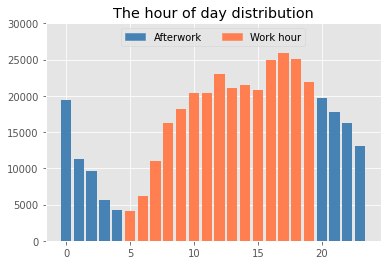

In [9]:
# hour data 
hour = df['HOUR'].value_counts()
hour = hour.sort_index()
color = ['steelblue','steelblue','steelblue','steelblue','steelblue','coral','coral','coral','coral','coral','coral','coral','coral','coral','coral','coral','coral','coral','coral','coral','steelblue','steelblue','steelblue','steelblue']

# hour distribution plot 
fig, ax = plt.subplots()
ax.bar(hour.index,hour,color = color,label = 'After Work Hour')

#set title and y axis range 
plt.title('The hour of day distribution')
plt.ylim(0,30000)

# set legend 
color = ['steelblue','coral']
labels = ['Afterwork', 'Work hour']
patches = [ mpatches.Patch(color=color[i], label="{:s}".format(labels[i]) ) for i in range(len(color)) ] 
ax.legend(handles = patches, ncol = 2,loc='upper center')
plt.show()

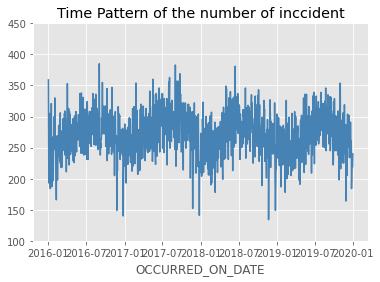

In [10]:
# Time plot 
df.groupby('OCCURRED_ON_DATE')[['OFFENSE_CODE']].count().plot(color='steelblue')

# decoration 
plt.ylim(100,450)
plt.legend().set_visible(False)
plt.title('Time Pattern of the number of inccident')
plt.show()

Time Pattern : 

- Clear Time Seasonality Pattern
- No clear Trend decreasing 
- **Hour** : More often during the work hour 
- **Week** : More often in Weekday than weekend 
- **Month** : Less in winter 